**1. Simple Sigmoid-Based Binary Classification: Cat vs. Not Cat**

In [4]:
import math

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Example "feature values" representing some measure of cat-likeness
# Let's say values > 0 mean likely cat, < 0 likely not cat
features = [2.0, -1.5, 0.0, 3.5, -2.2]

# Classify each example
for i, x in enumerate(features):
    prob = sigmoid(x)          # Compute probability of being a cat
    prediction = 1 if prob > 0.5 else 0  # Threshold at 0.5
    label = "Cat" if prediction == 1 else "Not Cat"
    print(f"Example {i+1}: feature={x}, probability={prob:.4f}, prediction={label}")

Example 1: feature=2.0, probability=0.8808, prediction=Cat
Example 2: feature=-1.5, probability=0.1824, prediction=Not Cat
Example 3: feature=0.0, probability=0.5000, prediction=Not Cat
Example 4: feature=3.5, probability=0.9707, prediction=Cat
Example 5: feature=-2.2, probability=0.0998, prediction=Not Cat


**2. tahN-Based Binary Classification: Cat vs. Not Cat**

Score -->  tanh(score) -->  Cat Probability --> Final Prediction
----------------------------------------------------------------------
-5.0 -->  -1.000      -->     0.0%           -->  Not Cat
-3.0 -->  -0.995      -->     0.2%           -->  Not Cat
-1.0 -->  -0.762      -->    11.9%           -->  Not Cat
-0.5 -->  -0.462      -->    26.9%           -->  Not Cat
 0.0 -->   0.000      -->    50.0%           -->  Cat
 0.5 -->   0.462      -->    73.1%           -->  Cat
 1.0 -->   0.762      -->    88.1%           -->  Cat
 2.0 -->   0.964      -->    98.2%           -->  Cat
 4.0 -->   0.999      -->   100.0%           -->  Cat
 6.0 -->   1.000      -->   100.0%           -->  Cat


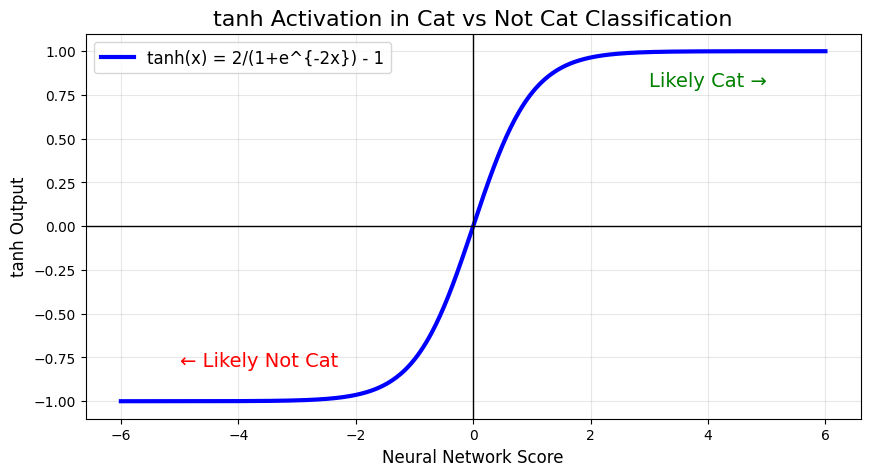

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# Simple "Cat vs Not Cat" example using tanh
# -------------------------------

# Fake but realistic scores from a neural network
# Positive score → more likely "Cat"
# Negative score → more likely "Not Cat"

# Step 1: Raw scores from the last layer (before activation)
scores = np.array([-5, -3, -1, -0.5, 0, 0.5, 1, 2, 4, 6])

# Step 2: Apply tanh using the exact formula you love
def tanh(x):
    return 2 / (1 + np.exp(-2*x)) - 1

probabilities = tanh(scores)          # Output between -1 and +1

# Step 3: Convert to probability of "Cat" (common trick)
# We map: -1 → 0% cat,  0 → 50% cat,  +1 → 100% cat
cat_probability = (probabilities + 1) / 2

# Step 4: Final prediction
prediction = cat_probability >= 0.5     # True = Cat, False = Not Cat

# -------------------------------
# Print results
# -------------------------------
print("Score -->  tanh(score) -->  Cat Probability --> Final Prediction")
print("-" * 70)
for s, t, p, pred in zip(scores, probabilities, cat_probability, prediction):
    animal = "Cat" if pred else "Not Cat"
    print(f"{s:4.1f} -->  {t:6.3f}      -->   {p:6.1%}           -->  {animal}")

plt.figure(figsize=(10, 5))
x = np.linspace(-6, 6, 500)
y = tanh(x)
plt.plot(x, y, 'b-', linewidth=3, label='tanh(x) = 2/(1+e^{-2x}) - 1')
plt.title('tanh Activation in Cat vs Not Cat Classification', fontsize=16)
plt.xlabel('Neural Network Score', fontsize=12)
plt.ylabel('tanh Output', fontsize=12)
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.text(3, 0.8, 'Likely Cat →', fontsize=14, color='green')
plt.text(-5, -0.8, '← Likely Not Cat', fontsize=14, color='red')
plt.show()

**3.ReLU Activation Function**

In [5]:
import numpy as np

# Raw scores from your neural network (higher = more Dog-like)
scores = np.array([-4.2, -1.5, -0.3, 0.0, 0.8, 2.1, 5.7])

# Apply ReLU activation (exactly what happens inside hidden layers)
relu_output = np.maximum(0, scores)   # this is ReLU!

print("Score → After ReLU → Meaning")
print("─────────────────────────────")
for score, out in zip(scores, relu_output):
    if out == 0:
        meaning = "Neuron completely silent (dead for this image)"
    else:
        meaning = f"Neuron active → sends {out:.1f} to next layer"
    print(f"{score:5.1f} →     {out:4.1f}     → {meaning}")

Score → After ReLU → Meaning
─────────────────────────────
 -4.2 →      0.0     → Neuron completely silent (dead for this image)
 -1.5 →      0.0     → Neuron completely silent (dead for this image)
 -0.3 →      0.0     → Neuron completely silent (dead for this image)
  0.0 →      0.0     → Neuron completely silent (dead for this image)
  0.8 →      0.8     → Neuron active → sends 0.8 to next layer
  2.1 →      2.1     → Neuron active → sends 2.1 to next layer
  5.7 →      5.7     → Neuron active → sends 5.7 to next layer


**4.Leaky ReLU Activation Function**

In [6]:
import numpy as np

scores = np.array([-5.0, -2.0, -0.5, 0.0, 1.2, 3.8])

relu = np.maximum(0, scores)

leaky_relu = np.where(scores > 0, scores, 0.01 * scores)

print("Score | ReLU | LeakyReLU | Meaning")
print("-------------------------------------")

for s, r, l in zip(scores, relu, leaky_relu):
    if r == 0 and l != 0:
        meaning = "ReLU kills neuron, Leaky keeps it alive"
    elif r == 0:
        meaning = "Dead neuron"
    else:
        meaning = "Neuron active"
    print(f"{s:5.1f} | {r:4.1f} | {l:9.3f} | {meaning}")


Score | ReLU | LeakyReLU | Meaning
-------------------------------------
 -5.0 |  0.0 |    -0.050 | ReLU kills neuron, Leaky keeps it alive
 -2.0 |  0.0 |    -0.020 | ReLU kills neuron, Leaky keeps it alive
 -0.5 |  0.0 |    -0.005 | ReLU kills neuron, Leaky keeps it alive
  0.0 |  0.0 |     0.000 | Dead neuron
  1.2 |  1.2 |     1.200 | Neuron active
  3.8 |  3.8 |     3.800 | Neuron active


**5.Softmax Activation Function**

In [8]:
import numpy as np

# Logits (raw scores from the model)
scores = np.array([2.0, 1.0, 0.1])   # [Cat, Dog, Horse]

# Softmax calculation
exp_scores = np.exp(scores)
probabilities = exp_scores / np.sum(exp_scores)

# Print results
classes = ["Cat", "Dog", "Horse"]
print("Class   Logit   Softmax Probability")
print("-------------------------------------")
for c, s, p in zip(classes, scores, probabilities):
    print(f"{c:6} {s:5.1f}        {p:.3f}")

Class   Logit   Softmax Probability
-------------------------------------
Cat      2.0        0.659
Dog      1.0        0.242
Horse    0.1        0.099
